# Finding the Two Best Markets to Advertise in an E-learning Product

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

## Understanding the Data

In [118]:
import pandas as pd
import numpy as np
newcoders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
newcoders.shape # Look for number of rows and columns.

(18175, 136)

In [119]:
newcoders.head(5) #Print the first five rows.

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
newcoders.columns #Try to understand what each column describes.


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [121]:
newcoders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

All 136 columns can be found below:

In [122]:
"Age","AttendedBootcamp","BootcampFinish","BootcampLoanYesNo","BootcampName","BootcampRecommend","ChildrenNumber","CityPopulation","CodeEventConferences","CodeEventDjangoGirls","CodeEventFCC","CodeEventGameJam","CodeEventGirlDev","CodeEventHackathons","CodeEventMeetup","CodeEventNodeSchool","CodeEventNone","CodeEventOther","CodeEventRailsBridge","CodeEventRailsGirls","CodeEventStartUpWknd","CodeEventWkdBootcamps","CodeEventWomenCode","CodeEventWorkshops","CommuteTime","CountryCitizen","CountryLive","EmploymentField","EmploymentFieldOther","EmploymentStatus","EmploymentStatusOther","ExpectedEarning","FinanciallySupporting","FirstDevJob","Gender","GenderOther","HasChildren","HasDebt","HasFinancialDependents","HasHighSpdInternet","HasHomeMortgage","HasServedInMilitary","HasStudentDebt","HomeMortgageOwe","HoursLearning","ID.x","ID.y","Income","IsEthnicMinority","IsReceiveDisabilitiesBenefits","IsSoftwareDev","IsUnderEmployed","JobApplyWhen","JobInterestBackEnd","JobInterestDataEngr","JobInterestDataSci","JobInterestDevOps","JobInterestFrontEnd","JobInterestFullStack","JobInterestGameDev","JobInterestInfoSec","JobInterestMobile","JobInterestOther","JobInterestProjMngr","JobInterestQAEngr","JobInterestUX","JobPref","JobRelocateYesNo","JobRoleInterest","JobWherePref","LanguageAtHome","MaritalStatus","MoneyForLearning","MonthsProgramming","NetworkID","Part1EndTime","Part1StartTime","Part2EndTime","Part2StartTime","PodcastChangeLog","PodcastCodeNewbie","PodcastCodePen","PodcastDevTea","PodcastDotNET","PodcastGiantRobots","PodcastJSAir","PodcastJSJabber","PodcastNone","PodcastOther","PodcastProgThrowdown","PodcastRubyRogues","PodcastSEDaily","PodcastSERadio","PodcastShopTalk","PodcastTalkPython","PodcastTheWebAhead","ResourceCodecademy","ResourceCodeWars","ResourceCoursera","ResourceCSS","ResourceEdX","ResourceEgghead","ResourceFCC","ResourceHackerRank","ResourceKA","ResourceLynda","ResourceMDN","ResourceOdinProj","ResourceOther","ResourcePluralSight","ResourceSkillcrush","ResourceSO","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3S","SchoolDegree","SchoolMajor","StudentDebtOwe","YouTubeCodeCourse","YouTubeCodingTrain","YouTubeCodingTut360","YouTubeComputerphile","YouTubeDerekBanas","YouTubeDevTips","YouTubeEngineeredTruth","YouTubeFCC","YouTubeFunFunFunction","YouTubeGoogleDev","YouTubeLearnCode","YouTubeLevelUpTuts","YouTubeMIT","YouTubeMozillaHacks","YouTubeOther","YouTubeSimplilearn","YouTubeTheNewBoston"

('Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

## Checking for Sample Representativity

As we mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What locations have the greatest densities of new coders.
* How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The ```JobRoleInterest``` column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [123]:
# Generate a frequency distribution table for 'JobRoleInterest'. Take percentages instead of absolute frequencies.

jobroleint_perc = 100* newcoders['JobRoleInterest'].value_counts(normalize = True)
jobroleint_perc

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The information in the table above is quite granular, but from a quick scan it looks like:

* A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
* A few people are interested in mobile development.
* A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

1) Split each string in the `JobRoleInterest` column to find the number of options for each participant.

2) We'll first drop the `null` values because we can't split `Nan` values.

3) Generate a frequency table for the variable describing the number of options.

In [124]:
# Split each string in the `JobRoleInterest` column to find the number of options for each participant.
interests_no_nulls  = newcoders['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(",")
number_options = splitted_interests.apply(lambda x: len(x))
number_options.value_counts(normalize = True, ascending = False) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [125]:
web_or_mobile = interests_no_nulls.str.contains('Mobile Developer|Web Developer')
web_or_mobile_freq = 100* web_or_mobile.value_counts(normalize = True, ascending = False)

([<matplotlib.axis.YTick at 0x7f17aaea4320>,
 <a list of 2 Text yticklabel objects>)

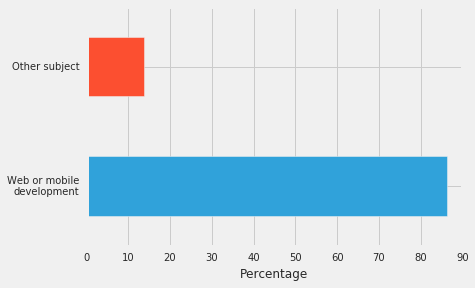

In [126]:
# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

web_or_mobile_freq.plot(kind = 'barh')
plt.xlabel('Percentage', fontsize = 12)
plt.yticks([0,1],['Web or mobile\ndevelopment', 'Other subject'])

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.

# New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the `CountryLive` variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [127]:
# Isolate the participants that answered what role they'd be interested in

newcoders_good = newcoders[newcoders['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies

newcoders_good_freq = newcoders_good['CountryLive'].value_counts(ascending = False)
newcoders_good_freq_perc = 100 * newcoders_good['CountryLive'].value_counts(normalize = True, ascending = False)

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute': newcoders_good_freq ,'Relative': newcoders_good_freq_perc})

,Absolute,Relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of \$59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.
Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.



In [128]:
newcoders_good['MonthsProgramming'].replace(0,1,inplace = True)
newcoders_good['MonthlySpend'] = newcoders_good['MoneyForLearning'] / newcoders_good['MonthsProgramming']

In [129]:
# Find out how many null values there are in the new column (the column describing the amount of money students spend per month).
newcoders_good['MonthlySpend'].isnull().sum() 

675

In [130]:
# Keep only the rows that don't have a null value for the new column.
newcoders_good = newcoders_good[newcoders_good['MonthlySpend'].notnull()]
newcoders_good = newcoders_good[newcoders_good['CountryLive'].notnull()]
newcoders_good.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 137 columns):
Age                              6161 non-null float64
AttendedBootcamp                 6184 non-null float64
BootcampFinish                   333 non-null float64
BootcampLoanYesNo                338 non-null float64
BootcampName                     300 non-null object
BootcampRecommend                338 non-null float64
ChildrenNumber                   863 non-null float64
CityPopulation                   6161 non-null object
CodeEventConferences             413 non-null float64
CodeEventDjangoGirls             49 non-null float64
CodeEventFCC                     672 non-null float64
CodeEventGameJam                 88 non-null float64
CodeEventGirlDev                 108 non-null float64
CodeEventHackathons              618 non-null float64
CodeEventMeetup                  866 non-null float64
CodeEventNodeSchool              100 non-null float64
CodeEventNone               

In [131]:
grouped = newcoders_good.groupby('CountryLive').mean()
grouped['MonthlySpend'][['United States of America','India', 'United Kingdom','Canada']].sort_values(ascending = False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MonthlySpend, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the money_per_month variable for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


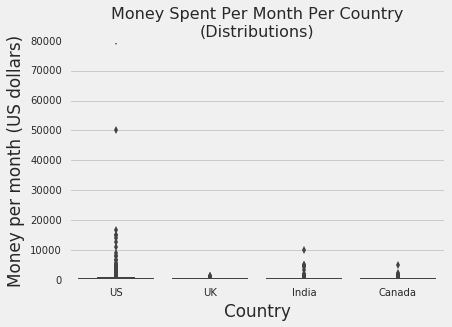

In [132]:
# Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) 

selected_countries = newcoders_good[newcoders_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(y = 'MonthlySpend', x = 'CountryLive',data = selected_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.


In [135]:
no_outliers = selected_countries[selected_countries['MonthlySpend'] < 20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


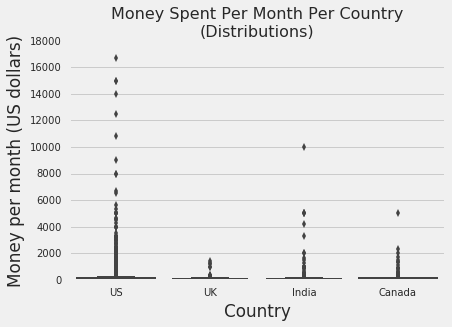

In [136]:
sns.boxplot(y = 'MonthlySpend', x = 'CountryLive',data = no_outliers)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada.

it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

* 60% for the US, 25% for India, 15% for Canada.
* 50% for the US, 30% for India, 20% for Canada; etc.
* Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

* 70% for the US, and 30% for India.
* 65% for the US, and 35% for Canada; etc.
* Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.